                                        Extract Transform Loading                                             


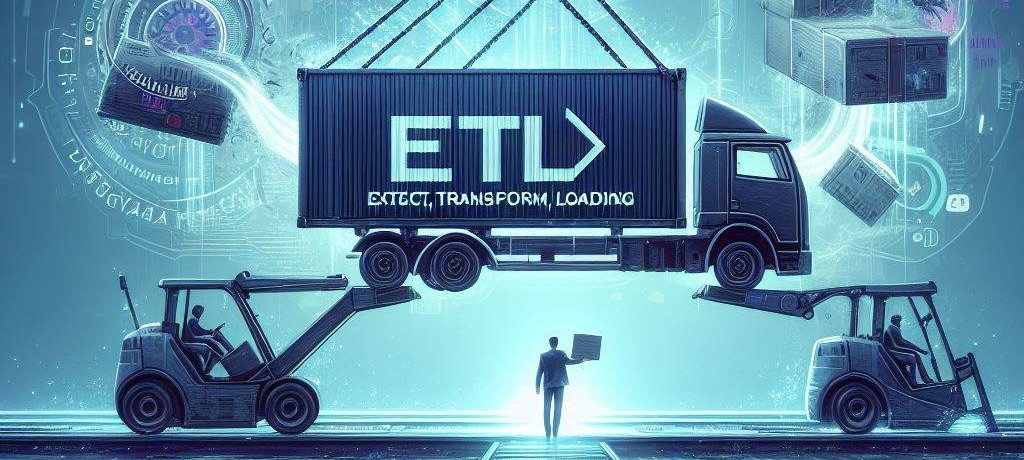

Para empezar este proyecto de Análisis de Datos, debemos entender dónde estamos parados, con qué datos contamos, y en qué estado se encuentran. Para ello, comenzaremos con un proceso de ETL (Extracción, Transformación y Carga de Datos) con el cual recopilaremos lo necesario.

In [1]:
# Importamos las librerías necesarias para este proceso de ETL
import pandas as pd # Librería de manipulación y análisis de datos.
import numpy as np # Librería fundamental para la computación científica en Python. 
import matplotlib.pyplot as plt # Librería para crear visualizaciones y gráficos en Python.
import seaborn as sns # Librería para crear gráficos estadísticos e informativos.
import funciones # De funciones.py, donde se encuentran las funciones que utilizaremos en este Python.

Como nuestros datasets están en un archivo .XLSX (Excel), lo mejor que podemos hacer es crear dataframes de PANDAS para trabajarlos más cómodamente.

In [2]:
# Especificamos la ruta del archivo Excel
archivo_excel = (r"Datasets\homicidios.xlsx")

# Especificamos los nombres de las hojas que contiene nuestro Dataset
nombres_hojas = ["HECHOS", "VICTIMAS"]

# Importamos las hojas del archivo Excel como Dataframes separados
dataframes = pd.read_excel(archivo_excel, sheet_name=nombres_hojas)

# Accedemos a cada Dataframe por su nombre de hoja
df_hechos = dataframes["HECHOS"]
df_victimas = dataframes["VICTIMAS"]

                                    Comenzamos el primer análisis de df_hechos                                            

In [3]:
print(df_hechos.head())  # Mostramos las primeras 5 filas del Dataframe
print(df_hechos.shape)   # Mostramos la cantidad de filas y columnas del Dataframe

          ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA HH  \
0  2016-0001           1 2016-01-01  2016   1   1  04:00:00  4   
1  2016-0002           1 2016-01-02  2016   1   2  01:15:00  1   
2  2016-0003           1 2016-01-03  2016   1   3  07:00:00  7   
3  2016-0004           1 2016-01-10  2016   1  10  00:00:00  0   
4  2016-0005           1 2016-01-21  2016   1  21  05:20:00  5   

                             LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  Altura  \
0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  ...     NaN   
1          AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ  ...     NaN   
2                         AV ENTRE RIOS 2034       AVENIDA  ...  2034.0   
3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       AVENIDA  ...     NaN   
4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        AVENIDA  ...     NaN   

                                 Cruce  \
0  FERNANDEZ DE LA CRUZ, F., GRAL. AV.   
1                  DE LOS CORRALES AV.   
2                         

In [4]:
funciones.verificar_tipo_datos(df_hechos) # Llamamos la función 'verificar_tipo_datos' que se encuentra en el archivo funciones.py, para tener un análisis detallado sobre los datos que contiene nuestro Dataframe

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,ID,[<class 'str'>],100.00,0.00,0
1,N_VICTIMAS,[<class 'int'>],100.00,0.00,0
2,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.00,0.00,0
3,AAAA,[<class 'int'>],100.00,0.00,0
4,MM,[<class 'int'>],100.00,0.00,0
5,DD,[<class 'int'>],100.00,0.00,0
6,HORA,"[<class 'datetime.time'>, <class 'str'>, <clas...",100.00,0.00,0
7,HH,"[<class 'int'>, <class 'str'>]",100.00,0.00,0
8,LUGAR_DEL_HECHO,[<class 'str'>],100.00,0.00,0
9,TIPO_DE_CALLE,[<class 'str'>],100.00,0.00,0


In [13]:
funciones.verifica_duplicados_por_columna(df_hechos, 'ID') # Llamamos a la función 'verifica_duplicados_por_columna', detallada en el archivo funciones.py, y nos posicionamos en la columna 'ID' para corroborar que no se encuentren filas duplicadas 

'No hay duplicados'

                                         Descripción del DataFrame df_hechos                                               

Este conjunto de datos contiene información sobre siniestros viales en la Ciudad Autónoma de Buenos Aires. Consta de 21 columnas y 696 filas, aunque algunas columnas aún contienen valores nulos, no posee filas duplicadas. A continuación se detallan las columnas:

🚑 N_VICTIMAS: Cantidad de personas que participaron del siniestro vial.

📅 FECHA: Fecha en que ocurrió el hecho, en formato YYYY-MM-DD.

📆 AAAA: Año en que ocurrió el hecho.

🗓️ MM: Mes en que ocurrió el hecho.

📆 DD: Día en que ocurrió el hecho.

⏰ HORA: Hora en que ocurrió el hecho.

🕒 HH: Franja horaria en que ocurrió el hecho.

📍 LUGAR_DEL_HECHO: Sitio donde ocurrió el hecho.

🛣️ TIPO_DE_CALLE: Tipo de pavimento donde ocurrió el hecho.

🏙️ Calle: Nombre de la calle donde ocurrió el hecho.

🏢 Altura: Altura numérica de la calle donde ocurrió el hecho.

⛔ Cruce: En caso de ser una encrucijada, calle que cruza.

🛣️ Dirección normalizada: Es la dirección normalizada según USIG.

🏘️ COMUNA: Comuna de la ciudad donde ocurrió el hecho. (Unidades político administrativas en las que se divide la Ciudad Autónoma de Buenos Aires)

🗺️ XY (CABA): Geocodificación plana.

🗺️ pos x: Longitud con separador punto. WGS84

🗺️ pos y: Latitud con separador punto. WGS84

👥 PARTICIPANTES: Conjunción de víctima y acusado.

🚗 VICTIMAS: Vehículo que ocupaba quien haya fallecido o se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos.

🚓 ACUSADO: Vehículo que ocupaba quien resultó acusado/a del hecho, sin implicar culpabilidad legal.

Este resumen proporciona una visión general de la estructura y el contenido del DataFrame 📊🏞️

                                            Limpieza del Dataframe df_hechos                                      

Como pudimos ver anteriormente, existen cuatro (4) columnas con datos nulos, la más grave es la columna 'Altura' con un 81.47% de datos nulos. Por lo tanto, la analizaremos por separado.

In [8]:
# Creamos un nuevo DataFrame con las filas donde 'Altura' no es nulo
df_hechos_con_altura = df_hechos.dropna(subset=['Altura'])
df_hechos_con_altura = df_hechos_con_altura.drop(columns=['Cruce'])

# Eliminamos la columna 'Altura' del DataFrame original
df_hechos = df_hechos.drop(columns=['Altura'])

Al eliminar la columna 'Altura', podemos observar que si bien es la columna con mayor cantidad de nulos, no es la única que puede llegar a ser irrelevante. También nos encontramos con que hay muchas columnas innecesarias que simplemente repiten la información. Por ejemplo: 
* ['Fecha'] = (['AAAA'], ['MM'], ['DD'])
* ['HORA'] = ['HH']
* ['XY (CABA)'] = (['pos x'], ['pos y'])
* ['LUGAR_DEL_HECHO] = (['Calle'], ['Cruce'], ['Dirección Normalizada'])

In [18]:
# Imprimimos rápidamente una fila de nuestro Dataframe para justificar nuestro análisis
df_columnas_parecidas = ["AAAA", "MM", "DD","FECHA", "HH","HORA","Dirección Normalizada", "Calle", "Cruce","LUGAR_DEL_HECHO"]
print(df_hechos[df_columnas_parecidas].loc[10])

AAAA                                                  2016
MM                                                       2
DD                                                      14
FECHA                                  2016-02-14 00:00:00
HH                                                       5
HORA                                              05:14:00
Dirección Normalizada    SCALABRINI ORTIZ, RAUL AV. y VERA
Calle                           SCALABRINI ORTIZ, RAUL AV.
Cruce                                                 VERA
LUGAR_DEL_HECHO                 AV SCALABRINI ORTIZ Y VERA
Name: 10, dtype: object


Para un mejor manejo de nuestros datos, decimidos eliminar las columnas antes nombradas, junto a la columna 'XY (CABA)', ya que preferimos utilizar las columnas de 'pos x' y 'pos y' para ubicar geográficamente nuestros datos.

In [20]:
# Utilizamos el comando drop
df_hechos = df_hechos.drop(columns=["AAAA", "MM", "DD","FECHA", "HH","HORA","Dirección Normalizada", "Calle", "Cruce","LUGAR_DEL_HECHO", "XY (CABA)"])

Ahora, el Dataframe df_hechos tiene sólo los datos que utilizaremos, quitando columnas sin relevancia.

In [24]:
# Volvemos a llamar a la función 'verificar_tipo_datos'
print(funciones.verificar_tipo_datos(df_hechos))
df_hechos.shape

    nombre_campo       tipo_datos  no_nulos_%  nulos_%  nulos
0             ID  [<class 'str'>]       100.0      0.0      0
1     N_VICTIMAS  [<class 'int'>]       100.0      0.0      0
2  TIPO_DE_CALLE  [<class 'str'>]       100.0      0.0      0
3         COMUNA  [<class 'int'>]       100.0      0.0      0
4          pos x  [<class 'str'>]       100.0      0.0      0
5          pos y  [<class 'str'>]       100.0      0.0      0
6  PARTICIPANTES  [<class 'str'>]       100.0      0.0      0
7        VICTIMA  [<class 'str'>]       100.0      0.0      0
8        ACUSADO  [<class 'str'>]       100.0      0.0      0


(696, 9)

Así concluímos el proceso de ETL para nuestro primer dataset, con un Dataframe de pandas que contiene 696 filas, 9 columnas, ningún duplicado, y ningún dato nulo 

                                    Comenzamos el segundo análisis df_victimas                                            

Ahora, vamos a analizar la otra página del dataset, guardada en un archivo diferente de pandas llamado df_victimas

In [ ]:
print(df_victimas.head())  # Mostramos las primeras 5 filas 
print(df_victimas.shape)   # Imprimimos el tamaño de nuestro Dataframe

    ID_hecho      FECHA  AAAA  MM  DD        ROL VICTIMA       SEXO EDAD  \
0  2016-0001 2016-01-01  2016   1   1  CONDUCTOR    MOTO  MASCULINO   19   
1  2016-0002 2016-01-02  2016   1   2  CONDUCTOR    AUTO  MASCULINO   70   
2  2016-0003 2016-01-03  2016   1   3  CONDUCTOR    MOTO  MASCULINO   30   
3  2016-0004 2016-01-10  2016   1  10  CONDUCTOR    MOTO  MASCULINO   18   
4  2016-0005 2016-01-21  2016   1  21  CONDUCTOR    MOTO  MASCULINO   29   

   FECHA_FALLECIMIENTO  
0  2016-01-01 00:00:00  
1  2016-01-02 00:00:00  
2  2016-01-03 00:00:00  
3                   SD  
4  2016-02-01 00:00:00  
(717, 10)


En nuestro primer vistazo, notamos que el Dataframe sigue un formato muy parecido al anteriormente analizado, df_hechos. En este caso, con 717 filas para 10 columnas.

In [11]:
# Una vez más, llamamos a nuestra función 'verificar_tipo_datos' para tener un mejor pantallazo de nuestro Dataframe
funciones.verificar_tipo_datos(df_victimas)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,ID_hecho,[<class 'str'>],100.0,0.0,0
1,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0,0
2,AAAA,[<class 'int'>],100.0,0.0,0
3,MM,[<class 'int'>],100.0,0.0,0
4,DD,[<class 'int'>],100.0,0.0,0
5,ROL,[<class 'str'>],100.0,0.0,0
6,VICTIMA,[<class 'str'>],100.0,0.0,0
7,SEXO,[<class 'str'>],100.0,0.0,0
8,EDAD,"[<class 'int'>, <class 'str'>]",100.0,0.0,0
9,FECHA_FALLECIMIENTO,"[<class 'datetime.datetime'>, <class 'str'>]",100.0,0.0,0


Vemos que los tipos de datos están correctos, y además, no contienen ningún dato nulo. 

In [12]:
# Por último, comprobamos los duplicados llamando a nuestra función 'verifica_duplicados_por_columna' en la columna 'ID_hecho'.
funciones.verifica_duplicados_por_columna(df_victimas, 'ID_hecho')

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
29,2016-0041,2016-03-29,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54,2016-03-29 00:00:00
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
98,2016-0126,2016-09-18,2016,9,18,CONDUCTOR,AUTO,MASCULINO,37,SD
99,2016-0126,2016-09-18,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,SD
163,2017-0026,2017-02-26,2017,2,26,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23,2017-02-26 00:00:00
164,2017-0026,2017-02-26,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19,2017-02-26 00:00:00
173,2017-0035,2017-03-23,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28,2017-03-23 00:00:00
174,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,2017-03-23 00:00:00
175,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,2017-03-23 00:00:00
177,2017-0036,2017-03-29,2017,3,29,CONDUCTOR,MOTO,MASCULINO,20,2017-03-29 00:00:00


Nuestra función nos muestra que existen varias filas duplicadas, sin embargo, debemos analizar que los casos duplicados realmente lo sean.

In [ ]:
# Para corroborar nuestras sospechas, llamamos a un subset del Dataframe sólo para un mismo 'ID_hecho' 
df_victimas[df_victimas['ID_hecho']=='2017-0035']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
173,2017-0035,2017-03-23,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28,2017-03-23 00:00:00
174,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,2017-03-23 00:00:00
175,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,2017-03-23 00:00:00


Como se puede apreciar, no se tratan de filas duplicadas, si no de distintos accidentados dentro del mismo siniestro vial.

                          Descripción del Dataframe df_victimas                                                       

Este conjunto de datos contiene información sobre las víctimas de siniestros viales en la Ciudad Autónoma de Buenos Aires. Consta de 10 columnas y 717 filas. A continuación se detallan las columnas:

📅 FECHA: Fecha en que ocurrió el hecho, en formato YYYY-MM-DD.

📆 AAAA: Año en que ocurrió el hecho.

🗓️ MM: Mes en que ocurrió el hecho.

📆 DD: Día en que ocurrió el hecho.

🚑 ROL: Posición relativa al vehículo que presentaba la víctima en el momento del siniestro.

🚗 VICTIMA: Vehículo que ocupaba quien haya fallecido o se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos.

🧑 SEXO: Sexo informado por fuente policial de la víctima.

🎂 EDAD: Edad de la víctima al momento del siniestro.

🕯️ FECHA_FALLECIMIENTO: Fecha de fallecimiento de la víctima.

Este resumen proporciona una visión general de la estructura y el contenido del Dataframe df_victimas 📊🏞️

                                            Limpieza del Dataframe df_victimas                                      

Como pasó en el Dataframe anterior, podemos observar que la mayoría de las columnas no aporta un valor real para nuestro análisis. Por lo tanto, decidimos eliminar las columnas 'AAAA', 'MM', 'DD' y 'FECHA_FALLECIMIENTO'. 

In [25]:
# Utilizamos el comando drop
df_victimas = df_victimas.drop(columns=["AAAA", "MM", "DD", "FECHA_FALLECIMIENTO"])
print(df_victimas.head())

De esta manera, tenemos un Dataframe que nos aporta únicamente el Rol que tenía la Víctima del siniestro (Conductor, Pasajero, Peatón, Otro), su Edad y su Sexo. Por ello, decidimos unificar los dataframes df_hechos y df_victimas en uno solo, para continuar con el Análisis Exploratorio de los Datos.

In [29]:
# Primero eliminamos la columna 'Victima', que coincide con la columna del dataframe df_hechos.
df_victimas = df_victimas.drop(columns=["VICTIMA"])
# Luego, renombraremos la columna 'ROL', que pasará a ser 'ROL_VICTIMA'. De esta manera nos servirá mucho más en nuestro dataframe unificado.
df_victimas.rename(columns={'ROL': 'ROL_VICTIMA'}, inplace=True)

KeyError: "['VICTIMA'] not found in axis"

Volvemos a ver por última vez nuestro Dataframe df_victimas

In [31]:
print(df_victimas.head())

    ID_hecho      FECHA ROL_VICTIMA       SEXO EDAD
0  2016-0001 2016-01-01   CONDUCTOR  MASCULINO   19
1  2016-0002 2016-01-02   CONDUCTOR  MASCULINO   70
2  2016-0003 2016-01-03   CONDUCTOR  MASCULINO   30
3  2016-0004 2016-01-10   CONDUCTOR  MASCULINO   18
4  2016-0005 2016-01-21   CONDUCTOR  MASCULINO   29


Para unificarlo en nuestro nuevo y único Dataframe, df_siniestros_viales

In [33]:
# Utilizamos la función Merge de Pandas para unir ambos dataframes según sus IDs
df_siniestros_viales = pd.merge(df_hechos, df_victimas, left_on='ID', right_on='ID_hecho', how='inner')
# Eliminamos la columna 'Id_hecho' para que no repita datos.
df_siniestros_viales = df_siniestros_viales.drop(columns=["ID_hecho"])

                                    Guardamos el Dataframe unificado                                            

In [37]:
# Con nuestra función, vemos los datos finales de nuestro Dataframe
funciones.verificar_tipo_datos(df_siniestros_viales)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,ID,[<class 'str'>],100.0,0.0,0
1,N_VICTIMAS,[<class 'int'>],100.0,0.0,0
2,TIPO_DE_CALLE,[<class 'str'>],100.0,0.0,0
3,COMUNA,[<class 'int'>],100.0,0.0,0
4,pos x,[<class 'str'>],100.0,0.0,0
5,pos y,[<class 'str'>],100.0,0.0,0
6,PARTICIPANTES,[<class 'str'>],100.0,0.0,0
7,VICTIMA,[<class 'str'>],100.0,0.0,0
8,ACUSADO,[<class 'str'>],100.0,0.0,0
9,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0,0


In [39]:
# Y lo guardamos en un archivo nuevo
df_siniestros_viales.to_csv('df_siniestros_viales.csv', index=False)